<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('glass.csv')
var_names = list(df.columns) 
labels = df.to_numpy('int')[:,-1] 
data = df.to_numpy('float')[:,:-1]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
from sklearn import preprocessing
data = preprocessing.minmax_scale(data)

In [11]:
set(labels), var_names

({1, 2, 3, 5, 6, 7},
 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

In [12]:
len(labels), data.shape

(214, (214, 9))

In [13]:
data

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

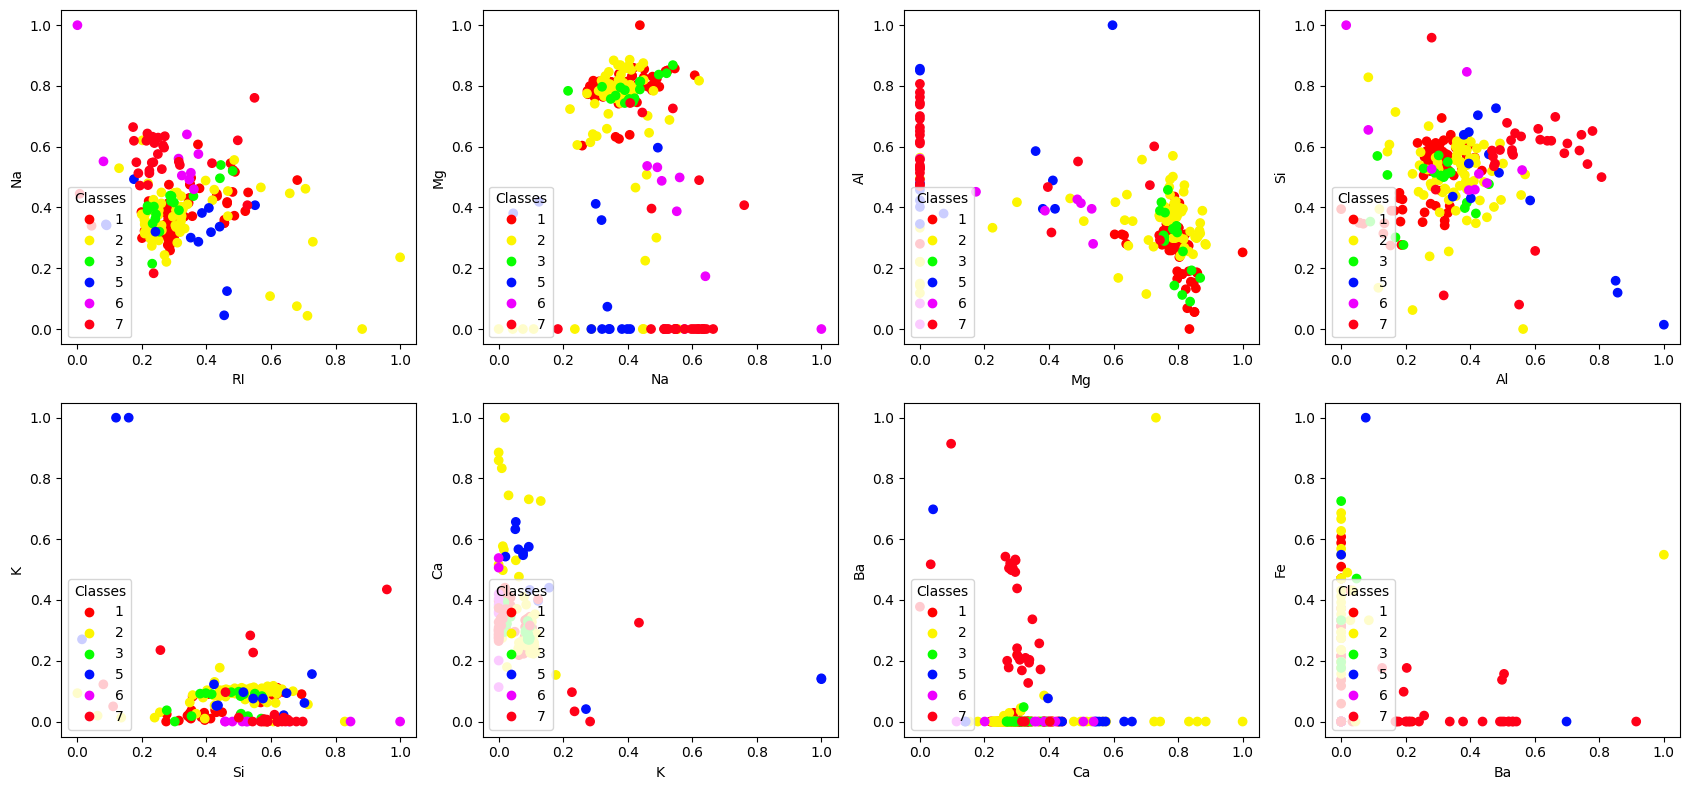

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(17, 8))
for i in range(data.shape[1]-1):
    points = axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv', label=labels)
    legend1 = axs[i // 4, i % 4].legend(*points.legend_elements(),
                    loc="lower left", title="Classes")
    
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])

plt.tight_layout()
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components = 2)
pca_data_2 = pca_2.fit(data).transform(data)


In [16]:
print(pca_2.explained_variance_ratio_)
print(pca_2.singular_values_)


[0.45429569 0.17990097]
[5.1049308  3.21245688]


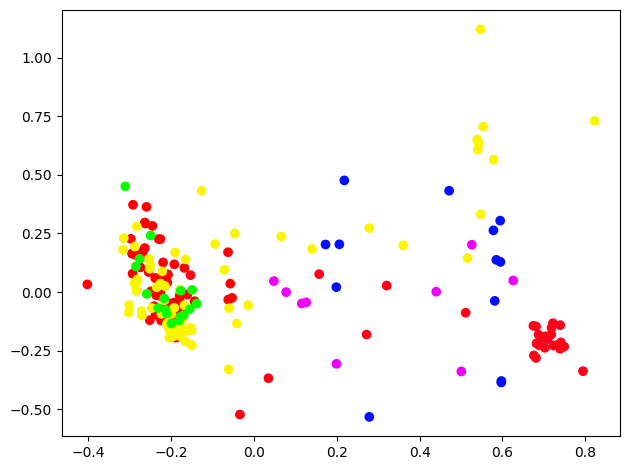

In [17]:
plt.scatter(pca_data_2[:,0], pca_data_2[:,1], c=labels, cmap='hsv')
plt.tight_layout()

plt.show()

Метод главных компонент (PCA) применяется для уменьшения размерности данных путем удаления менее значимой информации.

In [18]:
pca = PCA(n_components=4)
pca_data = pca.fit(data).transform(data)

print(sum(pca.explained_variance_ratio_))

0.8586697305102716


При 4 компонентах объясняют не менее 85% дисперсии данных


In [19]:
pca = pca.inverse_transform(pca_data)
pca_2 = pca_2.inverse_transform(pca_data_2)

In [ ]:
Используя MSE сравниваем различие между восстановленными данными и начальными
При сохранении как минимум 85% дисперсии данных удалось эффективно восстановить основную часть информации.

In [20]:
difference_n4 = sum(sum((data - pca)**2))
difference_n2 = sum(sum((data - pca_2)**2))
print(difference_n4, difference_n2)
print(difference_n4 < difference_n2)

8.107300858010408 20.984023634092054
True


In [21]:
parameters = ('auto', 'full', 'arpack', 'randomized')
for parameter in parameters:
    print(f'Параметр: {parameter}')
    pca = PCA(n_components=4, svd_solver=parameter)
    pca_data_new = pca.fit(data).transform(data)
    pca_inv = pca.inverse_transform(pca_data_new)
    print(sum(sum((data - pca_inv)**2)))
    print('*' * 50)

Параметр: auto
8.107300858010408
**************************************************
Параметр: full
8.107300858010408
**************************************************
Параметр: arpack
8.107300858010406
**************************************************
Параметр: randomized
8.107300858010404
**************************************************


In [ ]:
Сравнение kernel_pca_data с pca_data_2 через MSE

In [25]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2)
kernel_pca_data = kernel_pca.fit(data).transform(data)

print(sum(sum((pca_data_2 - kernel_pca_data)**2)))

2.903550989550861e-29


In [26]:
parameters = ('linear', 'poly', 'rbf', 'sigmoid', 'cosine')

for parameter in parameters:
    print(f'Параметр: {parameter}')
    kernel_pca = KernelPCA(n_components=4, kernel=parameter)
    kernel_pca_data = kernel_pca.fit(data).transform(data)
    print(sum(sum((pca_data - kernel_pca_data)**2)))
    print('*' * 50)

Параметр: linear
6.441971041197318e-29
**************************************************
Параметр: poly
6.142631668254261
**************************************************
Параметр: rbf
15.000681870624152
**************************************************
Параметр: sigmoid
31.84010528063429
**************************************************
Параметр: cosine
2.188330369514147
**************************************************


При заданных параметрах n_components=4 и kernel=linear, KernelPCA показал результаты, аналогичные методу PCA, так как достигнута очень низкая ошибка.

Сравнение sparse_pca_data с pca_data_2 через MSE

In [27]:
from sklearn.decomposition import SparsePCA

sparse_pca = SparsePCA(n_components=2, alpha=1)
sparse_pca_data = sparse_pca.fit(data).transform(data)
print(sum(sum((pca_data_2 - sparse_pca_data)**2)))

8.82234213910475


In [28]:
parameters = ('lars', 'cd')

for parameter in parameters:
    print(f'Параметр: {parameter}')
    sparse_pca = SparsePCA(n_components=4, alpha=0.01, method=parameter)
    sparse_pca_data = sparse_pca.fit(data).transform(data)
    print(sum(sum((pca_data - sparse_pca_data)**2)))
    print('*' * 50)

Параметр: lars
5.709906458511788
**************************************************
Параметр: cd
5.709632895745351
**************************************************


0.0035663364066657027


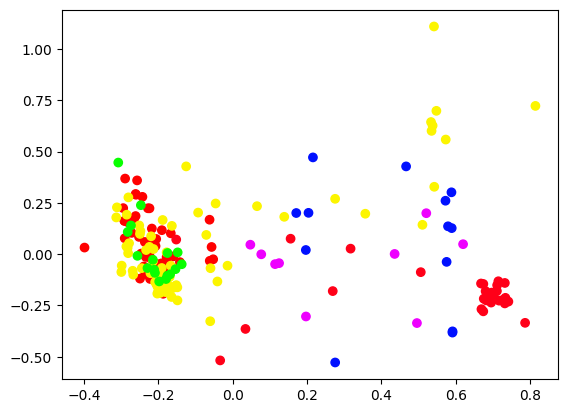

In [29]:
sparse_pca = SparsePCA(n_components=2, alpha=0)
sparse_pca_data = sparse_pca.fit(data).transform(data)
print(sum(sum((pca_data_2 - sparse_pca_data)**2)))

plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='hsv')
plt.show()

SparsePCA и PCA работают схожим образом при заданных параметрах n_components=2 и alpha=0, так как эти значения обеспечивают минимальное значение ошибки. Установка alpha=0 означает отсутствие использования L1-регуляризации.

Когда в методе KernelPCA применяется линейное ядро и в методе SparsePCA отсутствует L1-регуляризация, эти методы работают аналогично обычному PCA. В таком случае линейное ядро в KernelPCA эквивалентно линейной комбинации исходных переменных в PCA, а отсутствие L1-регуляризации в SparsePCA означает, что все исходные переменные имеют одинаковый вес при вычислении главных компонент, как и в обычном PCA. Однако, использование других ядер в KernelPCA или наличие L1-регуляризации в SparsePCA может привести к существенным отличиям от обычного PCA, что может быть полезно для решения определенных задач.

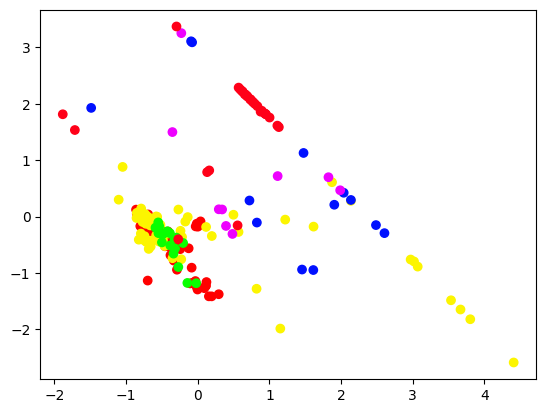

In [30]:
from sklearn.decomposition import FactorAnalysis
pca = FactorAnalysis(n_components = 2)
pca_data = pca.fit(data).transform(data)
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

PCA и факторный анализ (FA) - это два различных метода снижения размерности данных. PCA находит новые переменные (главные компоненты) из исходных переменных, объясняющие большую часть дисперсии данных, сохраняя при этом максимально возможное количество информации. FA, в свою очередь, идентифицирует скрытые факторы, которые объясняют корреляции между исходными переменными. FA помогает найти скрытые переменные, которые объясняют сложные зависимости между переменными.